In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Student Mental health.csv")
df.columns = df.columns.str.strip()

In [7]:
df['What is your CGPA?'] = df['What is your CGPA?'].astype(str).str.strip().replace({
    '0 - 1.99': 1.5,
    '2.00 - 2.49': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.49': 3.25,
    '3.50 - 4.00': 3.75
}).astype(float)

In [9]:
df = df.replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})
df = df.dropna()

In [10]:
X = df[['What is your CGPA?', 'Choose your gender', 'Do you have Depression?', 'Do you have Anxiety?']]
y = df['Age']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

print("Intercept:", round(model.intercept_, 3))
print("Coefficients:", dict(zip(X.columns, model.coef_.round(3))))
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 3))
print("R-squared:", round(r2_score(y_test, y_pred), 3))

Intercept: 20.743
Coefficients: {'What is your CGPA?': np.float64(0.001), 'Choose your gender': np.float64(0.006), 'Do you have Depression?': np.float64(-0.141), 'Do you have Anxiety?': np.float64(-0.304)}
Mean Squared Error: 6.124
R-squared: 0.014


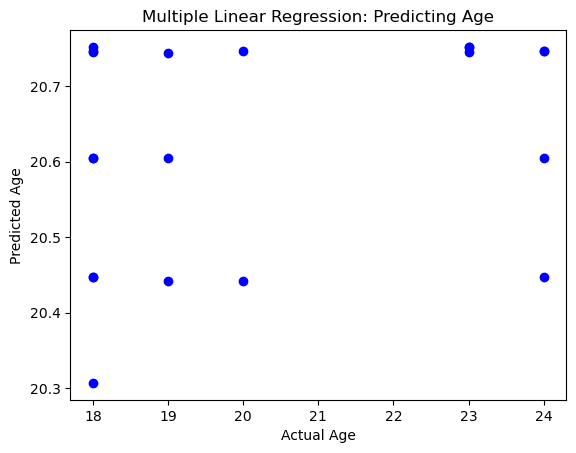

In [14]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Multiple Linear Regression: Predicting Age")
plt.show()